<a href="https://colab.research.google.com/github/Rama-Lekshmi/named-entity-recognition/blob/main/DL_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Model

In [7]:
data = pd.read_csv("NER_Dataset.csv", encoding="latin1")

In [8]:
data.head(50)

,Sentence_ID,Word,POS,Tag
0,Sentence: 1,"['Thousands', 'of', 'demonstrators', 'have', '...","['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 10,"['Iranian', 'officials', 'say', 'they', 'expec...","['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '..."
2,Sentence: 100,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...","['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '..."
3,Sentence: 1000,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 10000,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...","['B-geo', 'O', 'O', 'B-per', 'I-per', 'O', 'B-..."
5,Sentence: 10001,"['Mr.', 'Egeland', 'said', 'the', 'latest', 'f...","['NNP', 'NNP', 'VBD', 'DT', 'JJS', 'NNS', 'VBP...","['B-per', 'I-per', 'O', 'O', 'O', 'O', 'O', 'O..."
6,Sentence: 10002,"['He', 'said', 'last', 'week', ""'s"", 'tsunami'...","['PRP', 'VBD', 'JJ', 'NN', 'POS', 'NN', 'CC', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
7,Sentence: 10003,"['Some', '1,27,000', 'people', 'are', 'known',...","['DT', 'CD', 'NNS', 'VBP', 'VBN', 'JJ', '.']","['O', 'O', 'O', 'O', 'O', 'O', 'O']"
8,Sentence: 10004,"['Aid', 'is', 'being', 'rushed', 'to', 'the', ...","['NNP', 'VBZ', 'VBG', 'VBN', 'TO', 'DT', 'NN',...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
9,Sentence: 10005,"['Lebanese', 'politicians', 'are', 'condemning...","['JJ', 'NNS', 'VBP', 'VBG', 'NNP', 'POS', 'NN'...","['B-gpe', 'O', 'O', 'O', 'B-tim', 'O', 'O', 'O..."


In [9]:
data = data.fillna(method="ffill")

In [10]:
data.head(50)

,Sentence_ID,Word,POS,Tag
0,Sentence: 1,"['Thousands', 'of', 'demonstrators', 'have', '...","['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 10,"['Iranian', 'officials', 'say', 'they', 'expec...","['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '..."
2,Sentence: 100,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...","['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '..."
3,Sentence: 1000,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 10000,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...","['B-geo', 'O', 'O', 'B-per', 'I-per', 'O', 'B-..."
5,Sentence: 10001,"['Mr.', 'Egeland', 'said', 'the', 'latest', 'f...","['NNP', 'NNP', 'VBD', 'DT', 'JJS', 'NNS', 'VBP...","['B-per', 'I-per', 'O', 'O', 'O', 'O', 'O', 'O..."
6,Sentence: 10002,"['He', 'said', 'last', 'week', ""'s"", 'tsunami'...","['PRP', 'VBD', 'JJ', 'NN', 'POS', 'NN', 'CC', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
7,Sentence: 10003,"['Some', '1,27,000', 'people', 'are', 'known',...","['DT', 'CD', 'NNS', 'VBP', 'VBN', 'JJ', '.']","['O', 'O', 'O', 'O', 'O', 'O', 'O']"
8,Sentence: 10004,"['Aid', 'is', 'being', 'rushed', 'to', 'the', ...","['NNP', 'VBZ', 'VBG', 'VBN', 'TO', 'DT', 'NN',...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
9,Sentence: 10005,"['Lebanese', 'politicians', 'are', 'condemning...","['JJ', 'NNS', 'VBP', 'VBG', 'NNP', 'POS', 'NN'...","['B-gpe', 'O', 'O', 'O', 'B-tim', 'O', 'O', 'O..."


In [11]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())


Unique words in corpus: 47575
Unique tags in corpus: 33318


In [12]:
words=list(data['Word'].unique())
words.append("ENDPAD")
tags=list(data['Tag'].unique())

In [13]:
print("Unique tags are:", tags)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
num_words = len(words)
num_tags = len(tags)

In [15]:
num_words

47576

In [16]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence_ID").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [17]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [18]:
len(sentences)

47959

In [19]:
sentences[0]

[("['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.']",
  "['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP', 'TO', 'VB', 'DT', 'NN', 'IN', 'NNP', 'CC', 'VB', 'DT', 'NN', 'IN', 'JJ', 'NNS', 'IN', 'DT', 'NN', '.']",
  "['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']")]

In [20]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [21]:
word2idx

{"['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.']": 1,
 "['Iranian', 'officials', 'say', 'they', 'expect', 'to', 'get', 'access', 'to', 'sealed', 'sensitive', 'parts', 'of', 'the', 'plant', 'Wednesday', ',', 'after', 'an', 'IAEA', 'surveillance', 'system', 'begins', 'functioning', '.']": 2,
 "['Helicopter', 'gunships', 'Saturday', 'pounded', 'militant', 'hideouts', 'in', 'the', 'Orakzai', 'tribal', 'region', ',', 'where', 'many', 'Taliban', 'militants', 'are', 'believed', 'to', 'have', 'fled', 'to', 'avoid', 'an', 'earlier', 'military', 'offensive', 'in', 'nearby', 'South', 'Waziristan', '.']": 3,
 "['They', 'left', 'after', 'a', 'tense', 'hour-long', 'standoff', 'with', 'riot', 'police', '.']": 4,
 "['U.N.', 'relief', 'coordinator', 'Jan', 'Egeland', 'said', 'Sunday', ',', 'U.S.', ',', 'Indonesian', 'and', 'Australia

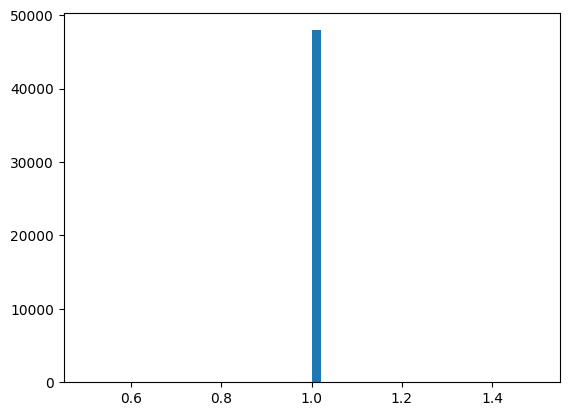

In [22]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()


In [23]:
X1 = [[word2idx[w[0]] for w in s] for s in sentences]

In [24]:
type(X1[0])

list

In [25]:
X1[0]

[1]

In [26]:
max_len = 50

In [27]:

nums = [[1], [2, 3], [4, 5, 6]]
sequence.pad_sequences(nums)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]], dtype=int32)

In [28]:
nums = [[1], [2, 3], [4, 5, 6]]
sequence.pad_sequences(nums,maxlen=2)


array([[0, 1],
       [2, 3],
       [5, 6]], dtype=int32)

In [29]:
X = sequence.pad_sequences(maxlen=max_len,
                  sequences=X1, padding="post",
                  value=num_words-1)

In [30]:

X[0]

array([    1, 47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575,
       47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575,
       47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575,
       47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575,
       47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575,
       47575, 47575, 47575, 47575, 47575], dtype=int32)

In [31]:
y1 = [[tag2idx[w[2]] for w in s] for s in sentences]

In [32]:
tag2idx = {
    "PAD": 0,
    "B-LOC": 1,
    "I-LOC": 2,
    "B-ORG": 3,
    "I-ORG": 4,
    "B-PER": 5,
    "I-PER": 6,
    "B-MISC": 7,
    "I-MISC": 8
}

y = sequence.pad_sequences(maxlen=max_len,
                  sequences=y1,
                  padding="post",
                  value=tag2idx["PAD"])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=1)

In [34]:
X_train[0]

array([41532, 47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575,
       47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575,
       47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575,
       47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575,
       47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575, 47575,
       47575, 47575, 47575, 47575, 47575], dtype=int32)

In [35]:
y_train[0]

array([29407,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0], dtype=int32)

In [36]:
input_word = layers.Input(shape=(max_len,))
embedding_layer = layers.Embedding(input_dim=num_words,
                                   output_dim=50,
                                   input_length=max_len)(input_word)
dropout_layer = layers.SpatialDropout1D(0.1)(embedding_layer)
bidirectional_lstm = layers.Bidirectional(
    layers.LSTM(units=100, return_sequences=True,
                recurrent_dropout=0.1))(dropout_layer)
output = layers.TimeDistributed(
    layers.Dense(num_tags, activation="softmax"))(bidirectional_lstm)
model = Model(input_word, output)

In [37]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            2378800   
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 50)            0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 50, 200)           120800    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 50, 33318)         6696918   
 ributed)                                                        
                                                             

In [38]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit( x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=3)

Epoch 1/3
  19/1199 [..............................] - ETA: 1:34:10 - loss: 0.1887 - accuracy: 0.9801

RAMA E.K. LEKSHMI
212222240082


<Axes: >

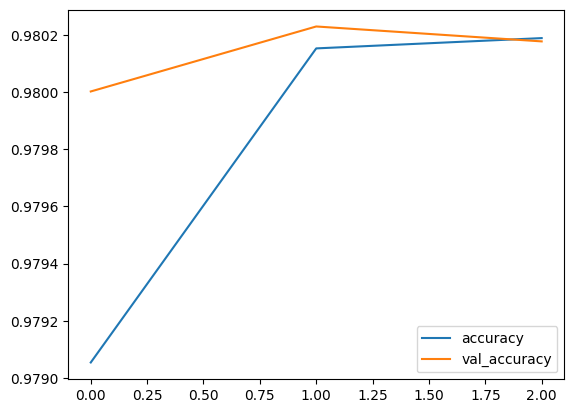

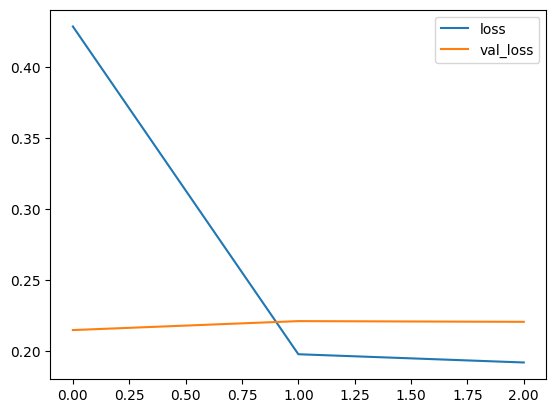

In [40]:
print("RAMA E.K. LEKSHMI")
print("212222240082")
metrics = pd.DataFrame(model.history.history)
metrics.head()
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

In [41]:
print("RAMA E.K. LEKSHMI")
print("212222240082")
i = 79
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(X_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

RAMA E.K. LEKSHMI
212222240082
1/1 [==============================] - 1s 756ms/step
Word           True 	 Pred

------------------------------
['The', 'U.N.', 'agency', "'s", 'spokesman', 'says', 'the', 'campaign', 'will', 'start', 'on', 'February', '25', 'and', 'will', 'end', 'on', 'March', '16', '.']['O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-tim', 'I-tim', 'O', 'O', 'O', 'O', 'B-tim', 'I-tim', 'O']	['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['The', 'United', 'Nations', 'is', 'praising', 'the', 'use', 'of', 'military', 'helicopters', 'to', 'drop', 'food', 'and', 'rescue', 'survivors', 'in', 'tsunami-ravaged', 'Indonesia', ',', 'saying', 'the', 'aircraft', 'are', '"', 'worth', 'their', 'weight', 'in', 'gold', '.', '"']['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']	['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O'